In [1]:
import pandas

In [2]:
dtype_dict = {'bathrooms':float, 
              'waterfront':int, 
              'sqft_above':int, 
              'sqft_living15':float, 
              'grade':int, 
              'yr_renovated':int, 
              'price':float, 
              'bedrooms':float, 
              'zipcode':str, 
              'long':float, 
              'sqft_lot15':float, 
              'sqft_living':float, 
              'floors':str, 
              'condition':int, 
              'lat':float, 
              'date':str, 
              'sqft_basement':int, 
              'yr_built':int, 
              'id':str, 
              'sqft_lot':int, 
              'view':int}

# 'kc_house_train_data.csv' & 'kc_house_test_data.csv' are splits of the data in 'kc_house_data.csv'
data = pandas.read_csv('kc_house_data.csv', dtype=dtype_dict)
train = pandas.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test = pandas.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [3]:
train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,1.738400e+04,17384.000000,17384.000000,17384.000000,1.738400e+04,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000
mean,5.393666e+05,3.369363,2.115048,2080.029510,1.509191e+04,0.007651,0.236079,3.410780,7.655028,1787.844512,292.184998,1971.152727,83.107973,47.559313,-122.213281,1985.994995,12776.380867
std,3.696912e+05,0.906468,0.771783,921.630888,4.145927e+04,0.087136,0.768008,0.649792,1.169818,827.107595,444.404136,29.328722,398.692283,0.138703,0.140906,686.512835,27175.730523
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.159300,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.049500e+03,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,47.468650,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571400,-122.229000,1840.000000,7620.000000
75%,6.400000e+05,4.000000,2.500000,2550.000000,1.066525e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.677625,-122.125000,2360.000000,10065.250000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### Basic Visualization of Bedrooms -> Price

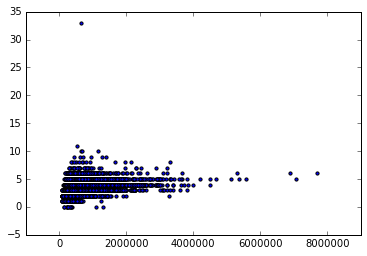

In [4]:
%matplotlib inline
# matplotlib.use('TkAgg')
# import matplotlib
import matplotlib.pyplot as plt

plt.scatter(data["price"], data["bedrooms"], s=10)
plt.ticklabel_format(style='plain')
plt.show()

In [5]:
# looks like we have a bad datapoint (33 bedrooms with 1.75 bath seems unlikely)
test[test["bedrooms"] > 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3102,2402100895,20140625T000000,640000.0,33.0,1.75,1620.0,6000,1,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330.0,4700.0


In [6]:
# so I'm going to reset it to the mean number of bedrooms
mean_bedrooms = data['bedrooms'].mean()
test[test['bedrooms'] > 20] = mean_bedrooms
data[data['bedrooms'] > 20] = mean_bedrooms

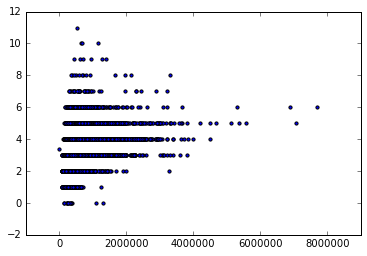

In [7]:
# looks much better now
plt.scatter(data["price"], data["bedrooms"], s=10)
plt.ticklabel_format(style='plain')
plt.show()

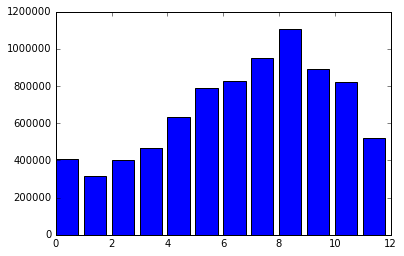

In [8]:
# lets see a bar chart
bedrooms = map(round, sorted(data['bedrooms'].unique()))
avg_prices = []
for br in bedrooms:
    avg_prices.append(data[data['bedrooms'] // 1 == br]['price'].mean())

plt.bar(bedrooms, avg_prices)
plt.show()


In [9]:
# looks like there may be some missing data here too?
data[data['bedrooms'] == 0]
# TODO clean this up

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0.0,0.00,3064.0,4764.0,3.5,0.0,2.0,...,7.0,3064.0,0.0,1990.0,0.0,98102,47.6362,-122.322,2360.0,4000.0
3119,3918400017,20150205T000000,380000.0,0.0,0.00,1470.0,979.0,3,0.0,2.0,...,8.0,1470.0,0.0,2006.0,0.0,98133,47.7145,-122.356,1470.0,1399.0
3467,1453602309,20140805T000000,288000.0,0.0,1.50,1430.0,1650.0,3,0.0,0.0,...,7.0,1430.0,0.0,1999.0,0.0,98125,47.7222,-122.290,1430.0,1650.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900.0,1,0.0,0.0,...,4.0,390.0,0.0,1953.0,0.0,98118,47.5260,-122.261,2170.0,6000.0
6994,2954400190,20140624T000000,1295650.0,0.0,0.00,4810.0,28008.0,2,0.0,0.0,...,12.0,4810.0,0.0,1990.0,0.0,98053,47.6642,-122.069,4740.0,35061.0
8477,2569500210,20141117T000000,339950.0,0.0,2.50,2290.0,8319.0,2,0.0,0.0,...,8.0,2290.0,0.0,1985.0,0.0,98042,47.3473,-122.151,2500.0,8751.0
8484,2310060040,20140925T000000,240000.0,0.0,2.50,1810.0,5669.0,2,0.0,0.0,...,7.0,1810.0,0.0,2003.0,0.0,98038,47.3493,-122.053,1810.0,5685.0
9773,3374500520,20150429T000000,355000.0,0.0,0.00,2460.0,8049.0,2,0.0,0.0,...,8.0,2460.0,0.0,1990.0,0.0,98031,47.4095,-122.168,2520.0,8050.0
9854,7849202190,20141223T000000,235000.0,0.0,0.00,1470.0,4800.0,2,0.0,0.0,...,7.0,1470.0,0.0,1996.0,0.0,98065,47.5265,-121.828,1060.0,7200.0
12653,7849202299,20150218T000000,320000.0,0.0,2.50,1490.0,7111.0,2,0.0,0.0,...,7.0,1490.0,0.0,1999.0,0.0,98065,47.5261,-121.826,1500.0,4675.0


### Split "test" set in half to get a validation and test set

In [248]:
from sklearn.cross_validation import train_test_split

oldtest = test
# [validation, newtest] = np.array_split(test,2)
validation, newtest = train_test_split(test, test_size=0.5)

# Simple Linear Regression, Bedrooms -> Price

In [298]:
import numpy as np
from scipy.optimize import minimize
from functools import partial
import math

def avg_squared_error(f, df, x):
    total_error = f(x, df["bedrooms"]) - df["price"]
    squared_error = np.square(total_error)
    n = df["price"].size
    return sum(squared_error) / n

def graph(f):
    x = np.array(range(0,13))
    y = f(x)
    plt.plot(x,y)
    
    plt.scatter(train['bedrooms'], train['price'])
    plt.ticklabel_format(style='plain')

    plt.show()

def minimize_f(h, start):
#     return minimize(partial(avg_squared_error, h, train), start, method='Nelder-Mead')
#     return minimize(partial(avg_squared_error, h, train), start, method='L-BFGS-B')
# FIXME
    return minimize(partial(avg_squared_error, h, train), start, method='L-BFGS-B')

def show_result(h, start):
    min_result = minimize_f(h, start)
    print('x: {0}'.format(min_result.x))
    train_error = math.sqrt(avg_squared_error(h, train, min_result.x))
    validation_error = math.sqrt(avg_squared_error(h, validation, min_result.x))
#     error = avg_squared_error(h, min_result.x)
    print ("train average squared error: {0:.2E}".format(train_error))
    print ("validation average squared error: {0:.2E}".format(validation_error))
    graph(partial(h, min_result.x))
    return validation_error

x: [  12315.45562641  153970.10894291]
train average squared error: 3.52E+05
validation average squared error: 3.27E+05


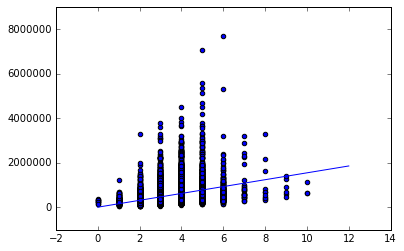

In [299]:
def h1(x, data): return x[0] + x[1] * data
h1_result = show_result(h1, [0, 0])

x: [  97624.20899704  141855.56707829   -2656.44864888]
train average squared error: 3.51E+05
validation average squared error: 3.26E+05


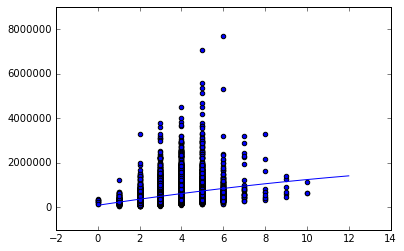

In [300]:
def h2(x, data): return h1(x, data) + x[2] * np.power(data, 2)
h2_result = show_result(h2, [1000, 1000, 1000])

x: [ 13630.10745288  29480.27562178  60362.56657253  -6866.45021725]
train average squared error: 3.56E+05
validation average squared error: 3.32E+05


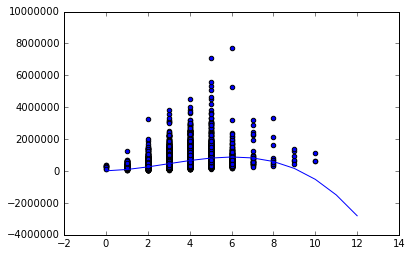

In [301]:
def h3(x, data): return h2(x, data) + x[3] * np.power(data, 3)
h3_result = show_result(h3, [1000, 1000, 1000, 1000])

x: [   947.75030644   1190.61815427   3547.05943295  17497.56080293
  -2093.74448888]
train average squared error: 3.85E+05
validation average squared error: 3.91E+05


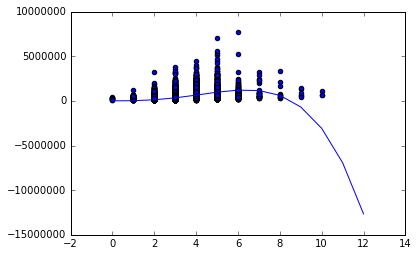

In [302]:
def h4(x, data): return h3(x, data) + x[4] * np.power(data, 4)
h4_result = show_result(h4, [1000, 1000, 1000, 1000, 1000])
# minimize(partial(avg_squared_error, h4, train), [1000, 1000, 1000, 1000, 1000], method='L-BFGS-B')

x: [  9.99934264e+02   9.99914440e+02   1.00011614e+03   9.99600980e+02
   9.97981102e+02  -2.03728131e-01   8.87021538e+00   8.80694181e+02
   5.38792238e+02  -3.01969799e+02   4.19934381e+01]
train average squared error: 6.54E+06
validation average squared error: 1.25E+08


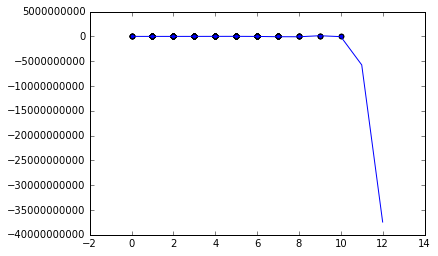

In [303]:
def h10(x, data): return h4(x, data) + x[5] * np.power(data, 5) * x[6] * np.power(data, 6) + x[7] * np.power(data, 7) + x[8] * np.power(data, 8) + x[9] * np.power(data, 9) + x[10] * np.power(data, 10)
h10_result = show_result(h10, [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])
# minimize(partial(avg_squared_error, h10, train), [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], method='L-BFGS-B')

In [305]:
print('h1 -> h2: {0:.2E}'.format(h1_result - h2_result))
print('h2 -> h3: {0:.2E}'.format(h2_result - h3_result))
print('h3 -> h4: {0:.2E}'.format(h3_result - h4_result))
print('h4 -> h10: {0:.2E}'.format(h4_result - h10_result))

h1 -> h2: 9.30E+02
h2 -> h3: -5.66E+03
h3 -> h4: -5.88E+04
h4 -> h10: -1.25E+08


# Linear Regression - Bed+Bath -> Price

In [207]:
def h(x):
    return x[0] + x[1] * train["bedrooms"] + x[2] * train["bathrooms"]

def avg_sq_error(x):
    return sum(np.square(h(x) - train["price"])) / train["price"].size

minimized = minimize(avg_sq_error, [1000, 1000, 1000], method='Nelder-Mead')
print(minimized)
print('{0:.2E}'.format(avg_sq_error(minimized.x)))

 final_simplex: (array([[ -32603.66744994,   20321.9361149 ,  238055.23470209],
       [ -32603.66744993,   20321.9361149 ,  238055.2347021 ],
       [ -32603.66744993,   20321.9361149 ,  238055.23470209],
       [ -32603.66744992,   20321.93611489,  238055.2347021 ]]), array([  9.89886360e+10,   9.89886360e+10,   9.89886360e+10,
         9.89886360e+10]))
           fun: 98988636011.537262
       message: 'Optimization terminated successfully.'
          nfev: 533
           nit: 270
        status: 0
       success: True
             x: array([ -32603.66744994,   20321.9361149 ,  238055.23470209])
9.90E+10


# Linear Regression - Bed+Bath+Sqft -> Price

In [138]:
def h(x):
    return x[0] + x[1] * train["bedrooms"] + x[2] * train["bathrooms"] + x[3] * train["sqft_living"]

def avg_sq_error(x):
    return sum(np.square(h(x) - train["price"])) / train["price"].size

minimized = minimize(avg_sq_error, [1000, 1000, 1000, 1000], method='Powell')
print(minimized.x)
print('error: {0:.2E}'.format(avg_sq_error(minimized.x)))

[ 87912.85888908 -65081.88008051   6942.15730579    315.40668936]
error: 6.69E+10


In [159]:
# def h(x):
#     x * np.array([np.repeat(1, train["bedrooms"].size), train["bedrooms"], train["sqft_living"]])
    
# def avg_sq_error_m(x):
#     diff = h(x) - train["price"]
#     (diff * diff) / 

# r = (np.matrix([1,2,3]) * np.matrix([1,2,3]).T)
# r[0,0]

array([10, 22, 36])

In [206]:
from sklearn import linear_model

def x_input(a):
    return np.matrix([a["bedrooms"], a["bathrooms"], a["sqft_living"]]).T
def y_output(a): return a["price"]

regr = linear_model.LinearRegression()
regr.fit(x_input(train), y_output(train)) # only fit the training set
print('training set accuracy: {0}'.format(regr.score(x_input(train), y_output(train))))
print('test set accuracy: {0}'.format(regr.score(x_input(test), y_output(test))))

training set accuracy: 0.510365676594
test set accuracy: 0.499370260294
